# 线性回归

In [1]:
import numpy as np
import math
from sklearn.metrics import mean_squared_error

## 数据准备部分

In [2]:
def shuffle_data(X,y,seed=None):
    '''将X和y的数据进行随机排序/乱序化'''
    if seed:
        np.random.seed(seed)
    idx=np.arange(X.shape[0])
    print(type(idx))
    np.random.shuffle(idx)
    return X[idx],y[idx] # 对于np.array, idx作为index数组可以改变array的顺序

In [3]:
def train_test_split(X, y, test_size=0.2, shuffle=True, seed=None):
    '''将数据集根据test_size分成训练集和测试集，可以知道是否随机洗牌'''
    if shuffle:
        X,y=shuffle_data(X, y, seed)
        split_i=len(y)-int(len(y)//(1/test_size))
        # split_i=len(y)-int(len(y)*test_size)
        X_train, X_test = X[:split_i], X[split_i:]
        y_train, y_test = y[:split_i], y[split_i:]
        return X_train, X_test, y_train, y_test

In [4]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [5]:
X, y = make_regression(n_samples=100, n_features=1, noise=20)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<class 'numpy.ndarray'>


In [7]:
X_train.shape

(80, 1)

应为使用make_regression函数是的X乱序，在绘制matplotlib的图像时会有问题，所以对X进行排序

In [8]:
s=sorted([(X_test[i][0], y_test[i]) for i in range(len(X_test))], key=lambda j:j[0])

In [18]:
s

[(-1.1485917382007333, 2.7703825824055777),
 (-0.9938200216244854, -55.68151401208429),
 (-0.9138580100515106, -4.885337323596332),
 (-0.741578991847208, -15.9161830633986),
 (-0.7044125041565268, -34.369442076112435),
 (-0.5498877262165497, 3.2407254271231043),
 (-0.3663853941852142, -23.144812061753104),
 (-0.11977576761835255, 11.250253908243003),
 (0.013477997985776253, 26.001772562918397),
 (0.02699858768638548, 47.305429311752135),
 (0.07697487811796382, 19.239163110565865),
 (0.20873524811319116, -13.209220217114826),
 (0.22425904173136332, -1.8068759974493531),
 (0.2585894193684694, 34.56178297426471),
 (0.2796704944956111, 20.957279256622314),
 (0.3010333923476699, 19.933648868387415),
 (0.8617184397944502, 4.592855466487936),
 (0.8925095329902133, -10.228247978593922),
 (1.6913037273647438, 0.1778355784649044),
 (1.9125336278023048, 36.7995449650502)]

In [9]:
X_test=np.array([[j[0]] for j in s])
y_test=np.array([j[1] for j in s])

## 线性回归

In [11]:
class Regression(object):
    '''
        基础线性回归模型，使用输入的X和y进行参数回归
        超参
        n_iterations:int 训练的步数
        learning _rate:float 学习率
        内部函数:
        initialize_weights:初始化参数
        fit开始训练
        predict:预测
        内部的数据
        n_iterations
        learning_rate
        regularization:正则化参数
        regularization.grad:正则化的梯度函数
    '''
    def __init__(self, n_iterations, learning_rate):
        self.n_iterations=n_iterations
        self.learning_rate = learning_rate
        self.regularization=lambda x:0
        self.regularization.grad=lambda x:0
    
    def initialize_weights(self, n_features):
        '''
            初始化系数，输入是feature的个数，输出是一个随机初始化好的参数矩阵
            [-1/sqrt(N),1/sqrt(N)]
        '''
        limit=1/math.sqrt(n_features)
        self.w=np.random.uniform(-limit, limit, (n_features,))
    
    def fit(self, X, y):
        # 插入偏置列1到X中
        X=np.insert(X, 0,1, axis=1) # 给每一行的第0列增加一个1
        self.training_errors=[] #保存每一步步长的训练Loss
        self.initialize_weights(n_features=X.shape[1]) #初始化参数w
        
        # 进行梯度下降迭代
        for i in range(self.n_iterations):
            y_pred = X.dot(self.w) #进行预测
            #计算Loss,做平均m个样本
            mse = np.mean(0.5*(y-y_pred)**2 + self.regularization(self.w))
            self.training_errors.append(mse) #将Loss键入到train_errors的数组中
            # 计算带有正则化项的梯度
            g_w = -(y-y_pred).T.dot(X)/len(X)+self.regularization.grad(self.w)
            #根据梯度下降算法更新参数
            self.w -= self.learning_rate*g_w
    
    def predict(self, X):
        # 通过输入X预测一个样本
        X = np.insert(X,0,1,axis=1)
        pred=X.dot(self.w)
        return pred

In [12]:
model = Regression(n_iterations=1000, learning_rate=0.01)

In [13]:
model.fit(X_train, y_train)

Text(0.5,0,'Steps')

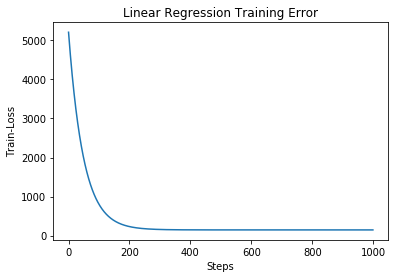

In [16]:
training=plt.plot(range(len(model.training_errors)), model.training_errors, label="Training Error")
plt.title("Linear Regression Training Error")
plt.ylabel("Train-Loss")
plt.xlabel("Steps")

In [ ]:
def test_and_draw:
    

## 评价模型

In [17]:
y_pred=model.predict(X_test)

In [19]:
mse=mean_squared_error(y_pred, y_test)

In [20]:
mse

396.79807737274433

## 带有最小二乘法的线性回归

In [25]:
def lsm_function(X, y):
    G=np.mat(np.insert(X, 0, 1, axis=1))
    return np.squeeze(np.asarray((G.T.dot(G)).I.dot(G.T).dot(y)))

In [26]:
lsm_function(X_train, y_train)

array([ 0.51332197, 99.43413383])

## 线性回归

In [23]:
class LinearRegression(Regression):
    '''
    带有最小二乘法的线性回归
    参数：
    --------------------
    n_iterations
    
    learning_rate
    
    
    gradient_descent:bool
        决定是否使用梯度下降法
        True 使用梯度下降
        False 使用最小二乘法
    '''
    
    def __init__(self, n_iterations=500, learning_rate=0.1, gradient_descent=True):
        self.gradient_descent=gradient_descent
        self.regularization=lambda x:0
        self.regularization.grad=lambda x:0
        super(LinearRegression,self).__init__(n_iterations=n_iterations,learning_rate=learning_rate)
        
    def fit(self, X, y):
        if not self.gradient_descent:
            self.w=lsm_function(X, y)
        else:
            super(LinearRegression, self).fit(X, y)
            
    def predict(self, X):
        return super(LinearRegression, self).predict(X)
        

In [30]:
model = LinearRegression(n_iterations=1000, learning_rate=0.1, gradient_descent=True)

In [31]:
model.fit(X_train, y_train)

In [32]:
model.w

array([ 0.51332197, 99.43413383])

## 正则化回归

In [33]:
class l1_regularization():
    '''
    L1正则化/函数
        
        
    '''
    def __init__(self, alpha):
        self.alpha = alpha
    
    def __call__(self, w):
        return self.alpha*np.linalg.norm(w, ord=1)
    
    def grad(self, w):
        # w>0->w`=1; w<0->w`=0; w==0->w`=0
        return self.alpha*np.sign(w)
        

In [34]:
l1=l1_regularization(alpha=0.01)

In [35]:
l1([-3,4])

0.07

In [36]:
l1.grad([-3, 4, 0])

array([-0.01,  0.01,  0.  ])

## L2正则化参数

In [38]:
class l2_regularization():
    '''
    L2正则化参数
    参数：
        alpha 正则化系数
    '''
    
    def __init__(self, alpha):
        self.alpha = alpha
        
    def __call__(self, w):
        return self.alpha*0.5 * w.T.dot(w)
    
    def grad():
        return self.alpha * w

In [39]:
l2 = l2_regularization(alpha=0.01)

In [40]:
l2([-3, 4])

AttributeError: 'list' object has no attribute 'T'

In [44]:
class LassoLinearRegression(Regression):
    def __init__(self, alpha, n_iterations=1000, learning_rate=0.01):
        self.regularization = l1_regularization(alpha=alpha)
        super(LassoLinearRegression, self).__init__(n_iterations, learning_rate)
        
    def fit(self, X, y):
        super(LassoLinearRegression, self).fit(X, y)
        
    def predict(self, X):
        return super(LassoLinearRegression, self).predict(X)

In [45]:
model=LassoLinearRegression(alpha=1.2, n_iterations=10000, learning_rate=0.1)

In [47]:
model.fit(X_train, y_train)

In [48]:
model.w

array([ 0.51332197, 99.43413383])

In [49]:
test_and_draw(model)

NameError: name 'test_and_draw' is not defined